In [2]:
import pandas as pd
import geopandas as gpd
import maup
import time

maup.progress.enabled = True

In [3]:
population_df = gpd.read_file("./sc_pl2020_b/sc_pl2020_p2_b.shp")

In [4]:
vap_df = gpd.read_file("./sc_pl2020_b/sc_pl2020_p4_b.shp")

In [5]:
election_df = gpd.read_file("./sc_2020_gen_2020_blocks/sc_2020_gen_2020_blocks.shp")

In [6]:
cong_df = gpd.read_file("./sc_cvap_2020_cd/sc_cvap_2020_cd.shp")

In [7]:
cong_df.shape

(7, 111)

In [8]:
print(population_df.columns)
print(vap_df.columns)
print(election_df.columns)
print(cong_df.columns)

Index(['GEOID20', 'SUMLEV', 'LOGRECNO', 'GEOID', 'COUNTY', 'P0020001',
       'P0020002', 'P0020003', 'P0020004', 'P0020005', 'P0020006', 'P0020007',
       'P0020008', 'P0020009', 'P0020010', 'P0020011', 'P0020012', 'P0020013',
       'P0020014', 'P0020015', 'P0020016', 'P0020017', 'P0020018', 'P0020019',
       'P0020020', 'P0020021', 'P0020022', 'P0020023', 'P0020024', 'P0020025',
       'P0020026', 'P0020027', 'P0020028', 'P0020029', 'P0020030', 'P0020031',
       'P0020032', 'P0020033', 'P0020034', 'P0020035', 'P0020036', 'P0020037',
       'P0020038', 'P0020039', 'P0020040', 'P0020041', 'P0020042', 'P0020043',
       'P0020044', 'P0020045', 'P0020046', 'P0020047', 'P0020048', 'P0020049',
       'P0020050', 'P0020051', 'P0020052', 'P0020053', 'P0020054', 'P0020055',
       'P0020056', 'P0020057', 'P0020058', 'P0020059', 'P0020060', 'P0020061',
       'P0020062', 'P0020063', 'P0020064', 'P0020065', 'P0020066', 'P0020067',
       'P0020068', 'P0020069', 'P0020070', 'P0020071', 'P002

In [9]:
print(cong_df['DIST'])

0    Congressional District 1 (116th Congress)
1    Congressional District 3 (116th Congress)
2    Congressional District 4 (116th Congress)
3    Congressional District 5 (116th Congress)
4    Congressional District 7 (116th Congress)
5    Congressional District 2 (116th Congress)
6    Congressional District 6 (116th Congress)
Name: DIST, dtype: object


geopandas.geodataframe.GeoDataFrame

In [14]:
# display(cong_df.columns)
df = pd.DataFrame(cong_df.columns)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
print(df)

              0
0       GEOID20
1          NAME
2         STATE
3          DIST
4       C_TOT20
5       CTOTMOE
6       C_NHS20
7       CNHSMOE
8       C_AIA20
9       CAIAMOE
10      C_ASN20
11      CASNMOE
12      C_BLK20
13      CBLKMOE
14      C_NHP20
15      CNHPMOE
16      C_WHT20
17      CWHTMOE
18      C_AIW20
19      CAIWMOE
20      C_ASW20
21      CASWMOE
22      C_BLW20
23      CBLWMOE
24      C_AIB20
25      CAIBMOE
26      C_2OM20
27      C2OMMOE
28      C_HSP20
29      CHSPMOE
30   CVAP_TOT20
31   CVAPTOTMOE
32   CVAP_NHS20
33   CVAPNHSMOE
34   CVAP_AIA20
35   CVAPAIAMOE
36   CVAP_ASN20
37   CVAPASNMOE
38   CVAP_BLK20
39   CVAPBLKMOE
40   CVAP_NHP20
41   CVAPNHPMOE
42   CVAP_WHT20
43   CVAPWHTMOE
44   CVAP_AIW20
45   CVAPAIWMOE
46   CVAP_ASW20
47   CVAPASWMOE
48   CVAP_BLW20
49   CVAPBLWMOE
50   CVAP_AIB20
51   CVAPAIBMOE
52   CVAP_2OM20
53   CVAP2OMMOE
54   CVAP_HSP20
55   CVAPHSPMOE
56    ALL_TOT20
57    ALLTOTMOE
58    ALL_NHS20
59    ALLNHSMOE
60    ALL_AIA20
61    AL

In [15]:
print(cong_df['NAME'])
print(cong_df['DIST'])

0    Congressional District 1 (116th Congress), Sou...
1    Congressional District 3 (116th Congress), Sou...
2    Congressional District 4 (116th Congress), Sou...
3    Congressional District 5 (116th Congress), Sou...
4    Congressional District 7 (116th Congress), Sou...
5    Congressional District 2 (116th Congress), Sou...
6    Congressional District 6 (116th Congress), Sou...
Name: NAME, dtype: object
0    Congressional District 1 (116th Congress)
1    Congressional District 3 (116th Congress)
2    Congressional District 4 (116th Congress)
3    Congressional District 5 (116th Congress)
4    Congressional District 7 (116th Congress)
5    Congressional District 2 (116th Congress)
6    Congressional District 6 (116th Congress)
Name: DIST, dtype: object


In [16]:
blocks_to_precincts_assignment = maup.assign(population_df.geometry, election_df.geometry)
vap_blocks_to_precincts_assignment = maup.assign(vap_df.geometry, election_df.geometry)

100%|█████████████████████████████████| 146844/146844 [01:04<00:00, 2279.28it/s]


In [17]:
pop_column_names = ['P0020001', 'P0020002', 'P0020005', 'P0020006', 'P0020007',
                    'P0020008', 'P0020009', 'P0020010', 'P0020011']

In [18]:
vap_column_names = ['P0040001', 'P0040002', 'P0040005', 'P0040006', 'P0040007',
                    'P0040008', 'P0040009', 'P0040010', 'P0040011']

In [19]:
for name in pop_column_names:
    election_df[name] = population_df[name].groupby(blocks_to_precincts_assignment).sum()
for name in vap_column_names:
    election_df[name] = vap_df[name].groupby(vap_blocks_to_precincts_assignment).sum()

In [20]:
print(population_df['P0020001'].sum())
print(election_df['P0020001'].sum())
print(vap_df['P0040001'].sum())
print(election_df['P0040001'].sum())

5118425
5118425
4014460
4014460


In [21]:
print(maup.doctor(election_df))

100%|█████████████████████████████████| 146844/146844 [01:10<00:00, 2083.08it/s]
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/maup/repair.py:331: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  overlaps = inters[inters.area > 0].make_valid()


True


In [22]:
precincts_to_districts_assignment = maup.assign(election_df.geometry, cong_df.geometry)
election_df["CD"] = precincts_to_districts_assignment

100%|█████████████████████████████████████████████| 7/7 [00:08<00:00,  1.22s/it]


In [23]:
print(set(election_df["CD"]))
for precinct_index in range(len(election_df)):
    election_df.at[precinct_index, "CD"] = cong_df.at[election_df.at[precinct_index, "CD"], 'DIST']
print(set(cong_df['DIST']))
print(set(election_df["CD"]))

{0, 1, 2, 3, 4, 5, 6}


/var/folders/22/kf5867y962j235jc4nj4l1300000gn/T/ipykernel_82771/2291687918.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Congressional District 3 (116th Congress)' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  election_df.at[precinct_index, "CD"] = cong_df.at[election_df.at[precinct_index, "CD"], 'DIST']


{'Congressional District 7 (116th Congress)', 'Congressional District 4 (116th Congress)', 'Congressional District 2 (116th Congress)', 'Congressional District 1 (116th Congress)', 'Congressional District 5 (116th Congress)', 'Congressional District 6 (116th Congress)', 'Congressional District 3 (116th Congress)'}
{'Congressional District 7 (116th Congress)', 'Congressional District 4 (116th Congress)', 'Congressional District 2 (116th Congress)', 'Congressional District 1 (116th Congress)', 'Congressional District 5 (116th Congress)', 'Congressional District 6 (116th Congress)', 'Congressional District 3 (116th Congress)'}


In [24]:
rename_dict = {'P0020001': 'TOTPOP', 'P0020002': 'HISP', 'P0020005': 'NH_WHITE', 'P0020006': 'NH_BLACK', 'P0020007': 'NH_AMIN',
                    'P0020008': 'NH_ASIAN', 'P0020009': 'NH_NHPI', 'P0020010': 'NH_OTHER', 'P0020011': 'NH_2MORE',
                    'P0040001': 'VAP', 'P0040002': 'HVAP', 'P0040005': 'WVAP', 'P0040006': 'BVAP', 'P0040007': 'AMINVAP',
                                        'P0040008': 'ASIANVAP', 'P0040009': 'NHPIVAP', 'P0040010': 'OTHERVAP', 'P0040011': '2MOREVAP',
                                        'G20PREDBID': 'G20PRED', 'G20PRERTRU': 'G20PRER', 'G20USSDDUR': 'G20USSD', 
                                        'G20USSRCUR': 'G20USSR'}

In [25]:
list(election_df.columns)

['GEOID20',
 'STATEFP',
 'COUNTYFP',
 'PRECINCTID',
 'VAP_MOD',
 'G20PRERTRU',
 'G20PREDBID',
 'G20PRELJOR',
 'G20PREGHAW',
 'G20PREAFUE',
 'G20USSRGRA',
 'G20USSDHAR',
 'G20USSCBLE',
 'G20USSOWRI',
 'geometry',
 'P0020001',
 'P0020002',
 'P0020005',
 'P0020006',
 'P0020007',
 'P0020008',
 'P0020009',
 'P0020010',
 'P0020011',
 'P0040001',
 'P0040002',
 'P0040005',
 'P0040006',
 'P0040007',
 'P0040008',
 'P0040009',
 'P0040010',
 'P0040011',
 'CD']

In [26]:
election_df.rename(columns=rename_dict, inplace = True)

In [27]:
list(election_df.columns)

['GEOID20',
 'STATEFP',
 'COUNTYFP',
 'PRECINCTID',
 'VAP_MOD',
 'G20PRER',
 'G20PRED',
 'G20PRELJOR',
 'G20PREGHAW',
 'G20PREAFUE',
 'G20USSRGRA',
 'G20USSDHAR',
 'G20USSCBLE',
 'G20USSOWRI',
 'geometry',
 'TOTPOP',
 'HISP',
 'NH_WHITE',
 'NH_BLACK',
 'NH_AMIN',
 'NH_ASIAN',
 'NH_NHPI',
 'NH_OTHER',
 'NH_2MORE',
 'VAP',
 'HVAP',
 'WVAP',
 'BVAP',
 'AMINVAP',
 'ASIANVAP',
 'NHPIVAP',
 'OTHERVAP',
 '2MOREVAP',
 'CD']

In [28]:
election_df.drop(columns=['G20PRELJOR',
 'G20PREGHAW',
 'G20PREAFUE',
 'G20USSRGRA',
 'G20USSDHAR',
 'G20USSCBLE',
 'G20USSOWRI'], inplace=True)
list(election_df.columns)

['GEOID20',
 'STATEFP',
 'COUNTYFP',
 'PRECINCTID',
 'VAP_MOD',
 'G20PRER',
 'G20PRED',
 'geometry',
 'TOTPOP',
 'HISP',
 'NH_WHITE',
 'NH_BLACK',
 'NH_AMIN',
 'NH_ASIAN',
 'NH_NHPI',
 'NH_OTHER',
 'NH_2MORE',
 'VAP',
 'HVAP',
 'WVAP',
 'BVAP',
 'AMINVAP',
 'ASIANVAP',
 'NHPIVAP',
 'OTHERVAP',
 '2MOREVAP',
 'CD']

<AxesSubplot: >

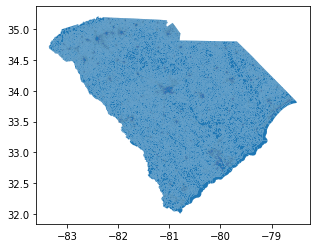

In [29]:
election_df.plot()

In [36]:
dictionary = {'Congressional District 1 (116th Congress)' : 1,
              'Congressional District 3 (116th Congress)' : 3,
              'Congressional District 4 (116th Congress)' : 4,
              'Congressional District 5 (116th Congress)' : 5,
              'Congressional District 7 (116th Congress)' : 7,
              'Congressional District 2 (116th Congress)' : 2,
              'Congressional District 6 (116th Congress)' : 6}

for key in dictionary:
    old_value = key
    election_df.loc[election_df['CD'] == old_value, 'CD'] = dictionary[key]

In [38]:
print(election_df.loc[election_df["CD"] == 1, "TOTPOP"].sum())
print(election_df.loc[election_df["CD"] == 2, "TOTPOP"].sum())
pop_vals = [election_df.loc[election_df["CD"] == n, "TOTPOP"].sum() for n in range(1, 8)]
print(pop_vals)

818893
721829
[818893, 721829, 706785, 760233, 736286, 646463, 727936]


In [40]:
election_df.to_file("./SC/SC.shp")

shp_file = gpd.read_file("./SC/SC.shp")

shp_file.to_file("./SC/SC.geojson", driver='GeoJSON')

In [41]:
gdf = gpd.read_file("./SC/SC.shp")